## Finance Data Project



In [152]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

## Data


In [153]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [ ]:
bac = yf.download('BAC',start,end)
gc = yf.download('C',start,end)
gs = yf.download('GS',start,end)
jpm = yf.download('JPM',start,end)
ms = yf.download('MS',start,end)
wfc = yf.download('WFC',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [155]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [ ]:
df = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}

bank_stocks = pd.concat(df.values(), axis=1, keys=df.keys())
bank_stocks.columns.names = ['Ticker','Stock info','Company']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [157]:
bank_stocks.head()

Ticker            BAC                                                      C  \
Stock info      Close       High        Low       Open    Volume       Close   
Company           BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173681  31.239895  30.557888  31.067736  16296700  321.442688   
2006-01-04  30.842611  31.279625  30.756532  31.120710  17757900  315.508240   
2006-01-05  30.882332  31.008141  30.670446  30.842605  14970700  317.073273   
2006-01-06  30.835979  31.061108  30.690307  30.988272  12599800  317.073273   
2006-01-09  30.855862  31.100856  30.696949  30.935321  15619400  315.573334   

Ticker                                                   ...         MS  \
Stock info        High         Low        Open   Volume  ...      Close   
Company              C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  322.029615  313.747375  319.551469  1537600  ...  31.934690   
2006-01-04  320.203699  315.312604  318.638553  1870960  ...  31.956587   
2006-01-05  318.116690  315.638544  315.899398  1143160  ...  32.044205   
2006-01-06  318.899273  314.334253  318.768836  1370210  ...  32.077065   
2006-01-09  317.855844  314.986407  316.942844  1680740  ...  32.416634   

Ticker                                                      WFC             \
Stock info       High        Low       Open   Volume      Close       High   
Company            MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.033271  31.074847  31.310344  5377000  18.675650  18.719558   
2006-01-04  32.465921  31.956587  32.148273  7977800  18.459038  18.628816   
2006-01-05  32.088019  31.775847  32.066112  5778000  18.438547  18.473673   
2006-01-06  32.230412  31.792276  32.186599  6889800  18.546858  18.602475   
2006-01-09  32.471402  32.104461  32.109939  4144500  18.543930  18.631748   

Ticker                                      
Stock info        Low       Open    Volume  
Company           WFC        WFC       WFC  
Date                                        
2006-01-03  18.262912  18.500017  11016400  
2006-01-04  18.362439  18.617107  10870000  
2006-01-05  18.330239  18.441474  10158000  
2006-01-06  18.374152  18.488313   8403800  
2006-01-09  18.473677  18.543930   5619600  

[5 rows x 30 columns]

# EDA


In [158]:
bank_stocks.xs(key = 'Close',level = 'Stock info',axis=1).max()

Ticker  Company
BAC     BAC         37.699574
C       C          383.228241
GS      GS         185.153229
JPM     JPM         53.603718
MS      MS          50.061150
WFC     WFC         44.026562
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [159]:
returns = pd.DataFrame()

**Using pandas pct_change() method on the Close column to create a column representing this return value.**

In [160]:
returns[[tick + ' Returns' for tick in tickers]] = bank_stocks.xs(key = 'Close',level = 'Stock info',axis=1).pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004960,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014168,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012031,0.016242,0.010586,-0.000158


**Creating a pairplot using seaborn of the returns dataframe.**

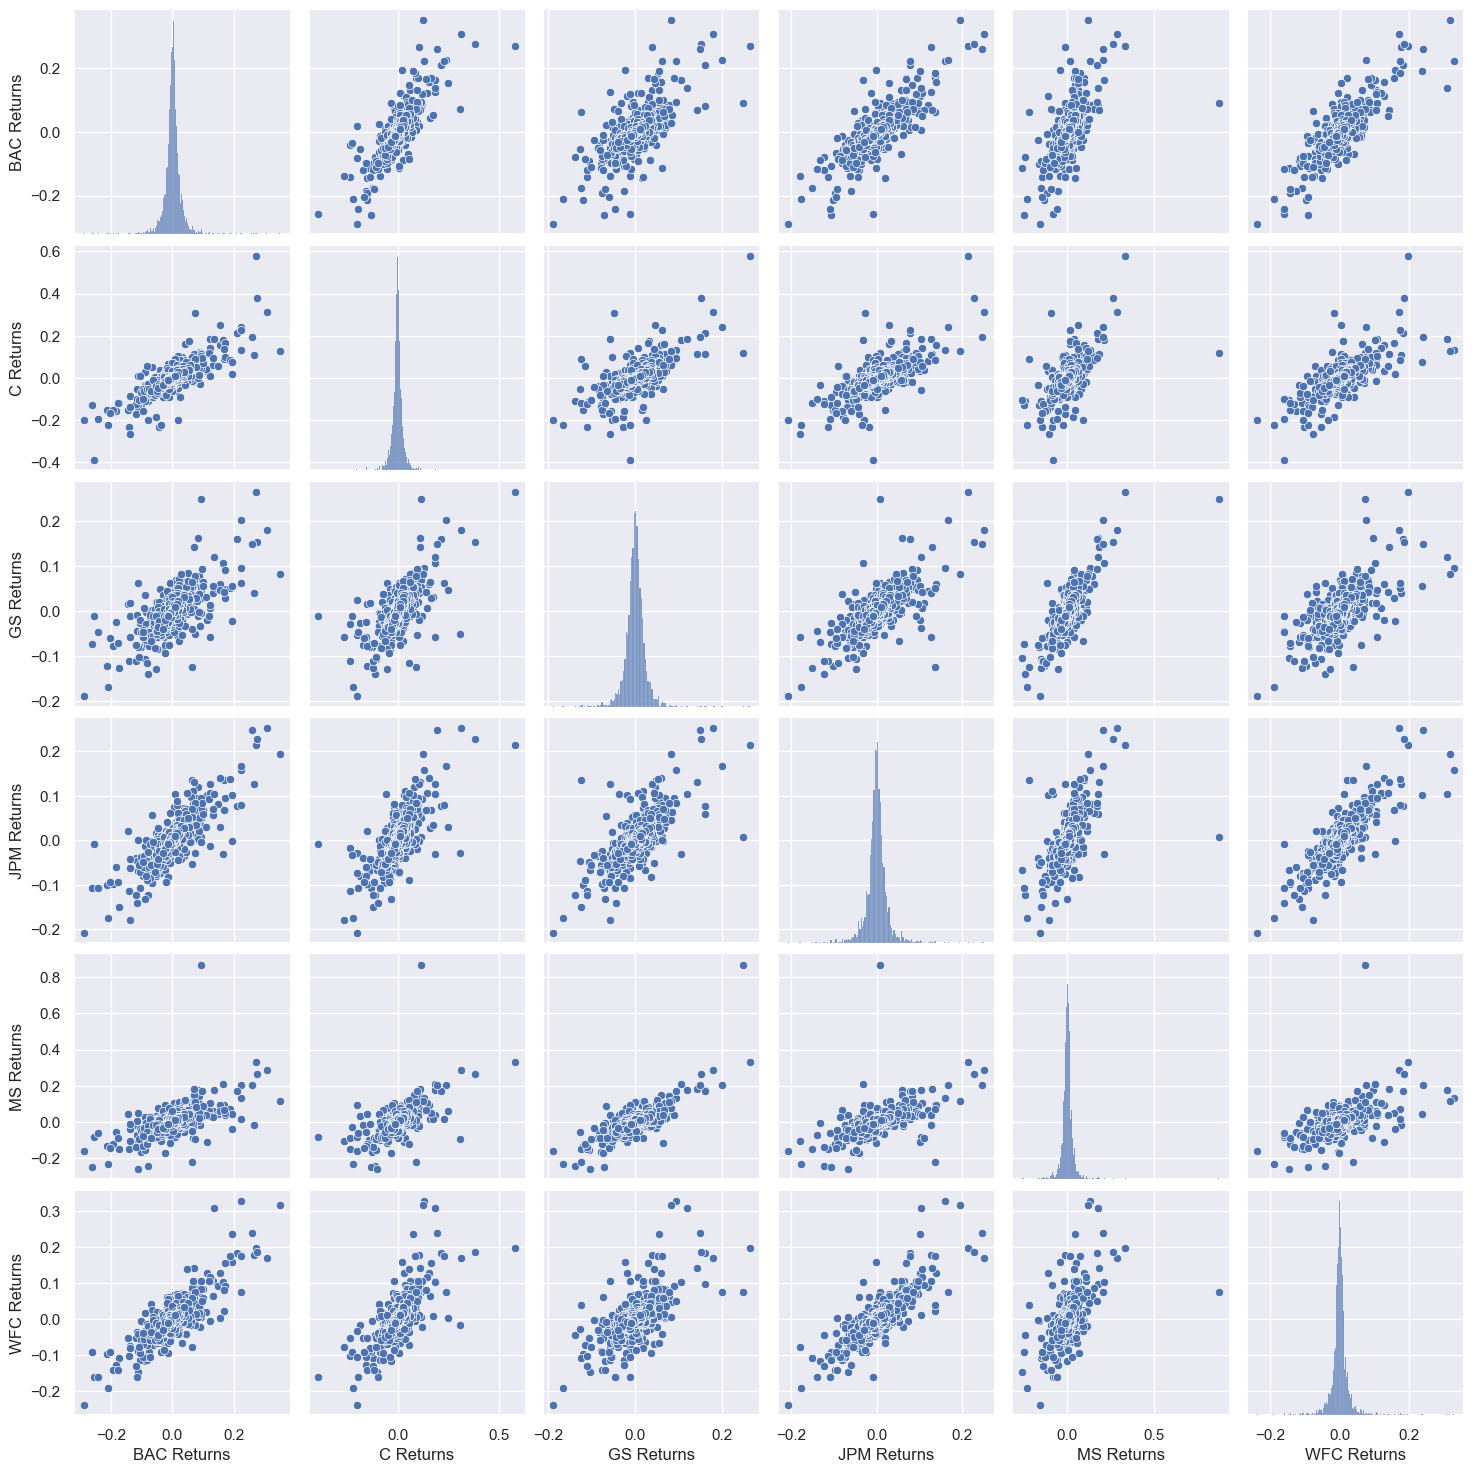

In [161]:
import seaborn as sns 
sns.set_theme()
sns.pairplot(returns)

**Figuring out on what dates each bank stock had the best and worst single day returns.**

In [162]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [163]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

**Getting the standard deviation of the returns**

In [164]:
returns.std()

BAC Returns    0.036659
C Returns      0.038672
GS Returns     0.025386
JPM Returns    0.027675
MS Returns     0.037717
WFC Returns    0.030195
dtype: float64

**Creating a displot using seaborn of the 2015 returns for Morgan Stanley**

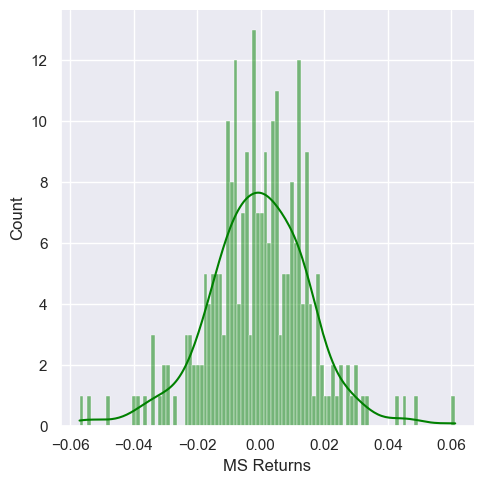

In [165]:
abc = returns['2015-01-01':'2015-12-31']['MS Returns']
sns.displot(abc,bins=100,kde=True,color='green')

**Creating a displot using seaborn of the 2008 returns for CitiGroup**

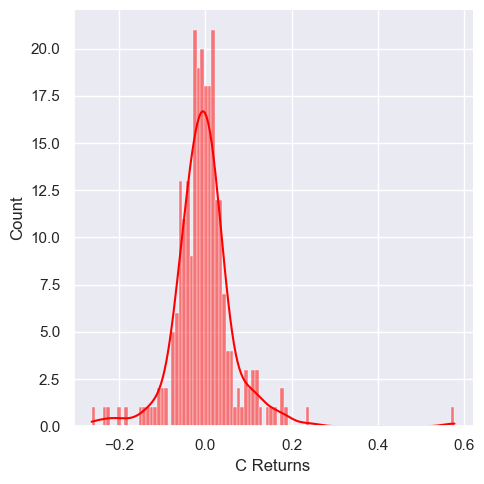

In [166]:
xyz = returns['2008-01-01':'2008-12-31']['C Returns']
sns.displot(xyz,bins=100,kde=True,color='red')

____
# More Visualization



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

**Creatinh a line plot showing Close price for each bank for the entire index of time.**

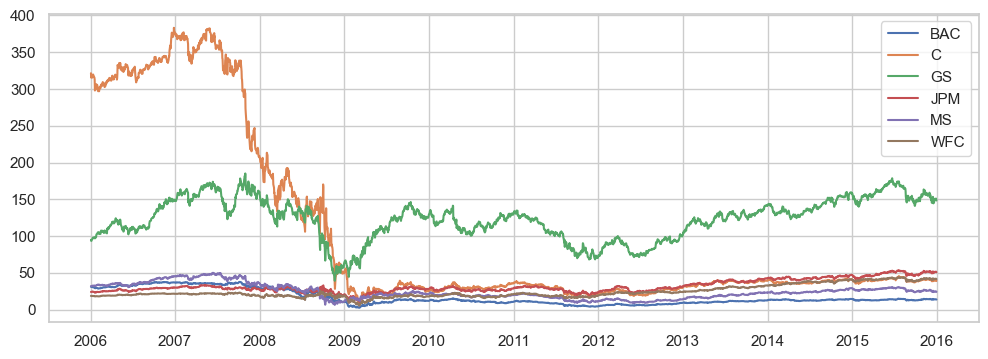

In [168]:
efg = bank_stocks.xs(key='Close',level='Stock info',axis=1)

plt.figure(figsize=[12,4])
plt.plot(efg,label=tickers)
plt.legend()
plt.show()

**Plotting the iplot for the above data**

In [169]:
bank_stocks.xs(key='Close',level='Stock info',axis=1).iplot()


c:\ANACONDA\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



## Moving Averages


**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

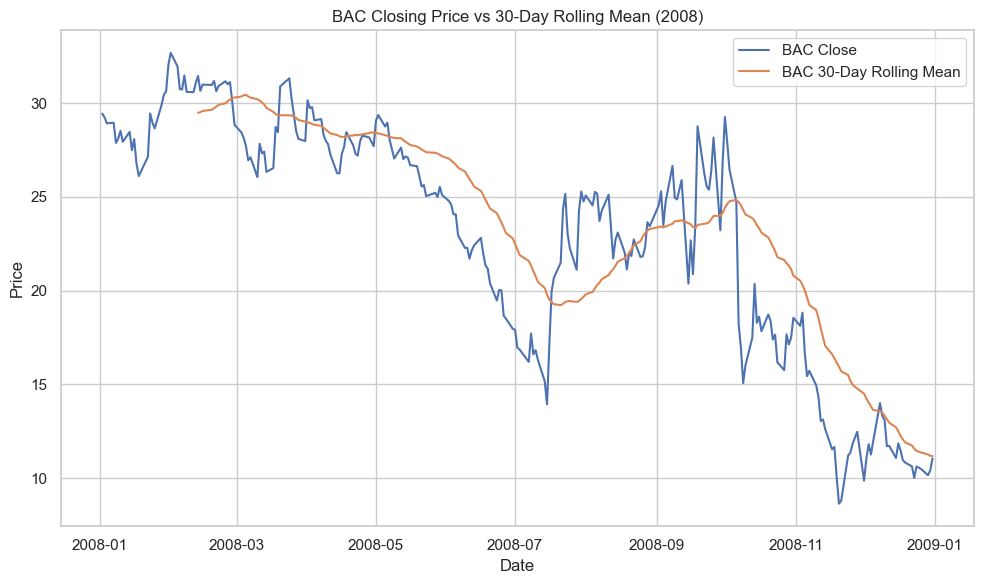

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))


ax.plot(
    bank_stocks.loc['2008-01-01':'2008-12-31', ('BAC','Close')],
    label='BAC Close'
)


ax.plot(
    bank_stocks.loc['2008-01-01':'2008-12-31', ('BAC','Close')].rolling(window=30).mean(),
    label='BAC 30-Day Rolling Mean'
)

ax.legend()
plt.title('BAC Closing Price vs 30-Day Rolling Mean (2008)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



**Creating a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Ticker-Company', ylabel='Ticker-Company'>

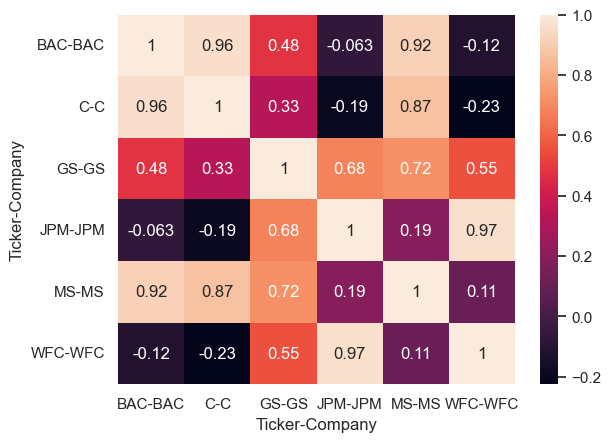

In [171]:
data = bank_stocks.xs(key='Close',level='Stock info',axis=1).corr()
sns.heatmap(data=data,annot=True)

**Using seaborn's clustermap to cluster the correlations together:**

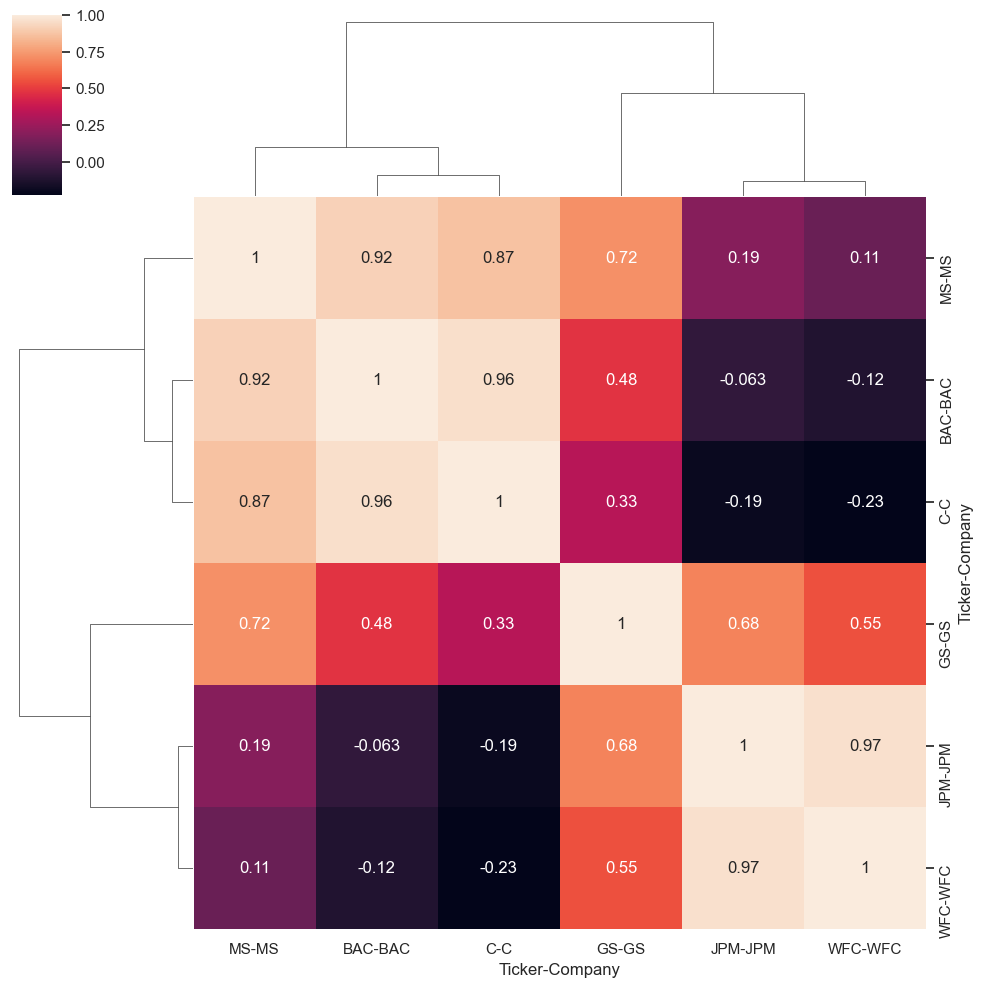

In [172]:
data = bank_stocks.xs(key='Close',level='Stock info',axis=1).corr()
sns.clustermap(data=data,annot=True)

**Creating iplot for the above data**

In [173]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [174]:

df = bank_stocks.loc['2015-01-01':'2016-01-01', 'BAC'][['Open', 'High', 'Low', 'Close']]

df.columns = ['open', 'high', 'low', 'close']

df.iplot(kind='candle', title='BAC Candlestick 2015')



**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [175]:
bank_stocks.loc['2015-01-01':'2015-12-31','MS']['Close'].ta_plot(study='sma',periods=[13,25,41])

c:\ANACONDA\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

c:\ANACONDA\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [176]:
bank_stocks.loc['2015-01-01':'2015-12-31','BAC']['Close'].ta_plot(study='boll')

c:\ANACONDA\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



## END OF THE PROJECT